In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import seaborn as sns
import imblearn
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rcParams.update({'font.size': 20})


In [3]:
data = pd.read_csv('heart_disease.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
def getMissingCount(data):
    try:
        missingCount = data.isnull().sum() * 100/ len(data)
        return missingCount
    except Exception as exp:
        print(str(exp))

In [6]:
def visualizeMissingValue(data):
    try:
        missingCount = getMissingCount(data)
        print(missingCount)
        
        #Plotting missing count columns as fractions
        plt.figure(figsize=(16, 8))
        plt.xticks(np.arange(len(missingCount)) + 0.5, missingCount.index, rotation='vertical')
        plt.ylabel('fraction of rows with missing data')
        plt.bar(np.arange(len(missingCount)), missingCount)
        plt.show()

        #Plotting missing count columns as color coded graph
        plt.figure(figsize=(15, 20))
        sns.heatmap(pd.DataFrame(data.isnull().sum() / data.shape[0] * 100), annot=True,
        cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
        plt.title("Heart disease - missing values")
        plt.show()
        
        missingColumn = data.columns[data.isna().any()].tolist()
        print(missingColumn)
        
        #TODO. This code is incomplete
        #msno.matrix(data.loc[:,['PctPrivateCoverageAlone']])
        #msno.bar(data.loc[:,['PctPrivateCoverageAlone']], color="blue", log=False, figsize=(30, 18))
        #msno.heatmap(data[missingColumn], figsize=(20, 20))

    except Exception as exp:
        print(str(exp))

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


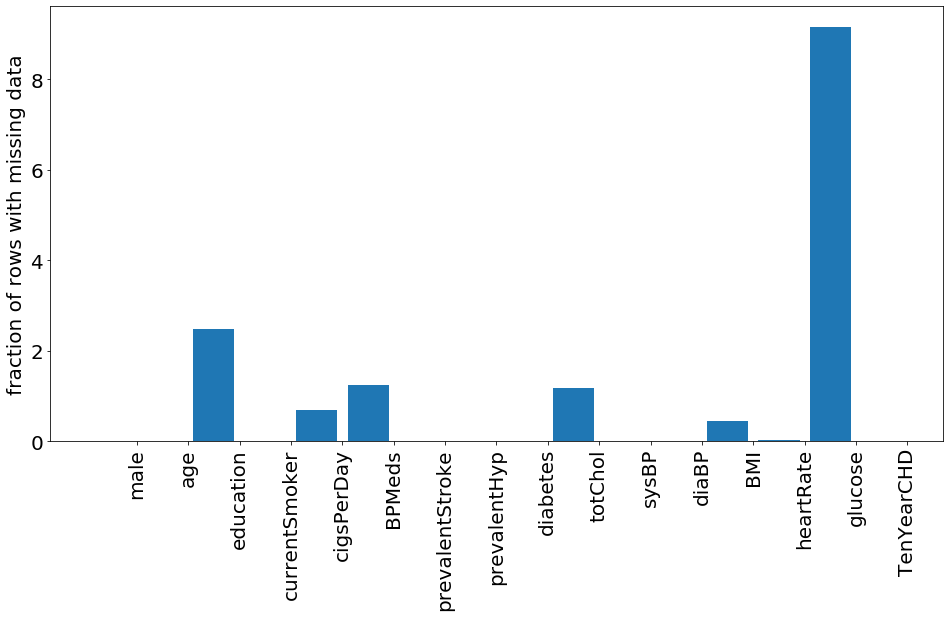

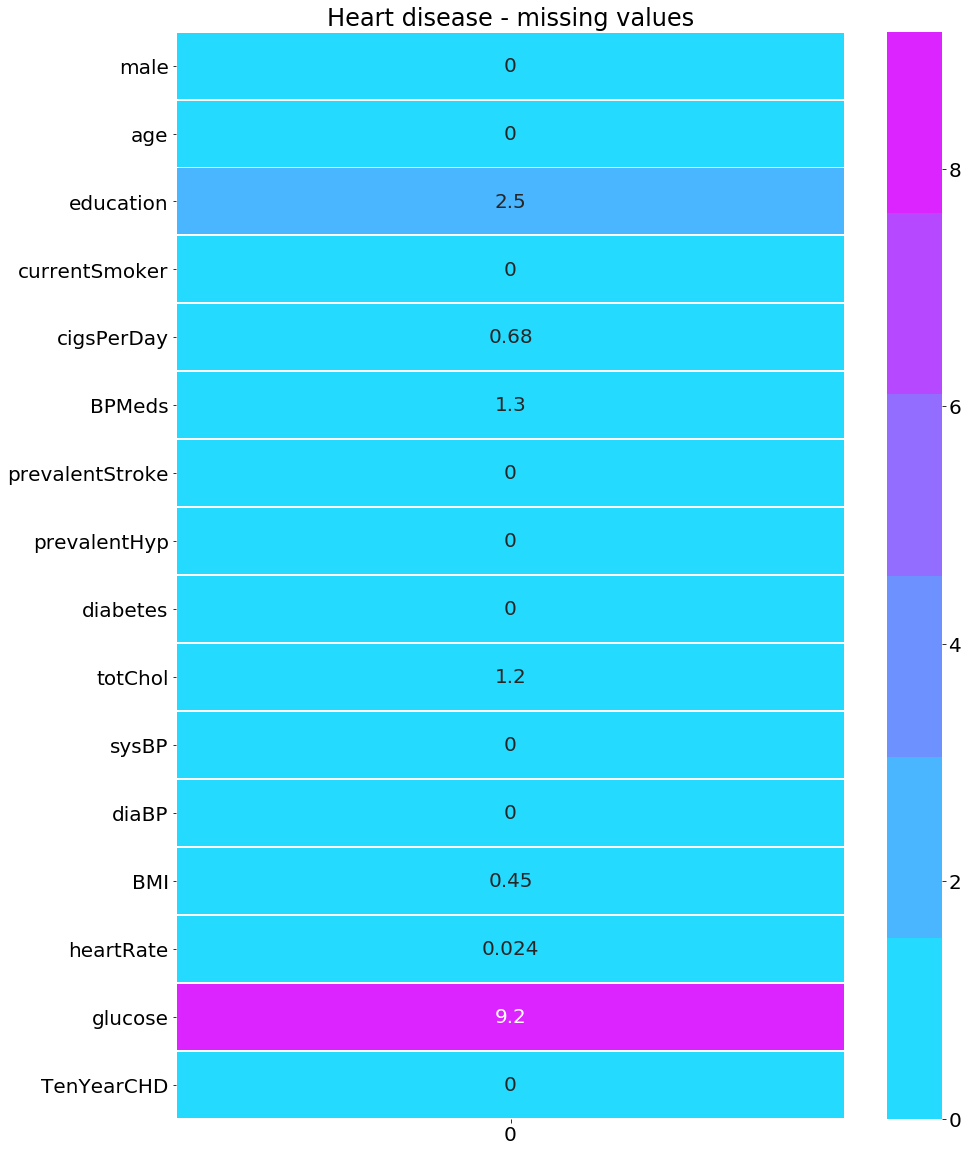

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [7]:
visualizeMissingValue(data)

In [8]:
data_01 = data.dropna(axis = 0, how ='any') 

In [9]:
def visualizeCorrelation(data):
        try:
            d1 = data.copy()

            categoricalCols = d1.select_dtypes(include=["category"]).columns 
            categoricalCols = categoricalCols.tolist()
            for i in categoricalCols:
                d1[i] = d1[i].astype('object')
            
            corr = d1.corr()
            g = sns.heatmap(corr, vmax=.9, center=0, square=True, linewidths=.5, 
                            cbar_kws={"shrink": .5}, annot=True, fmt='.1f', cmap='coolwarm')
            sns.despine()
            g.figure.set_size_inches(24, 20)
            plt.show()
        except Exception as exp:
            print(str(exp))  

In [10]:
data_categorical = data_01[['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']].copy()
data_numerical = data_01[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']].copy()

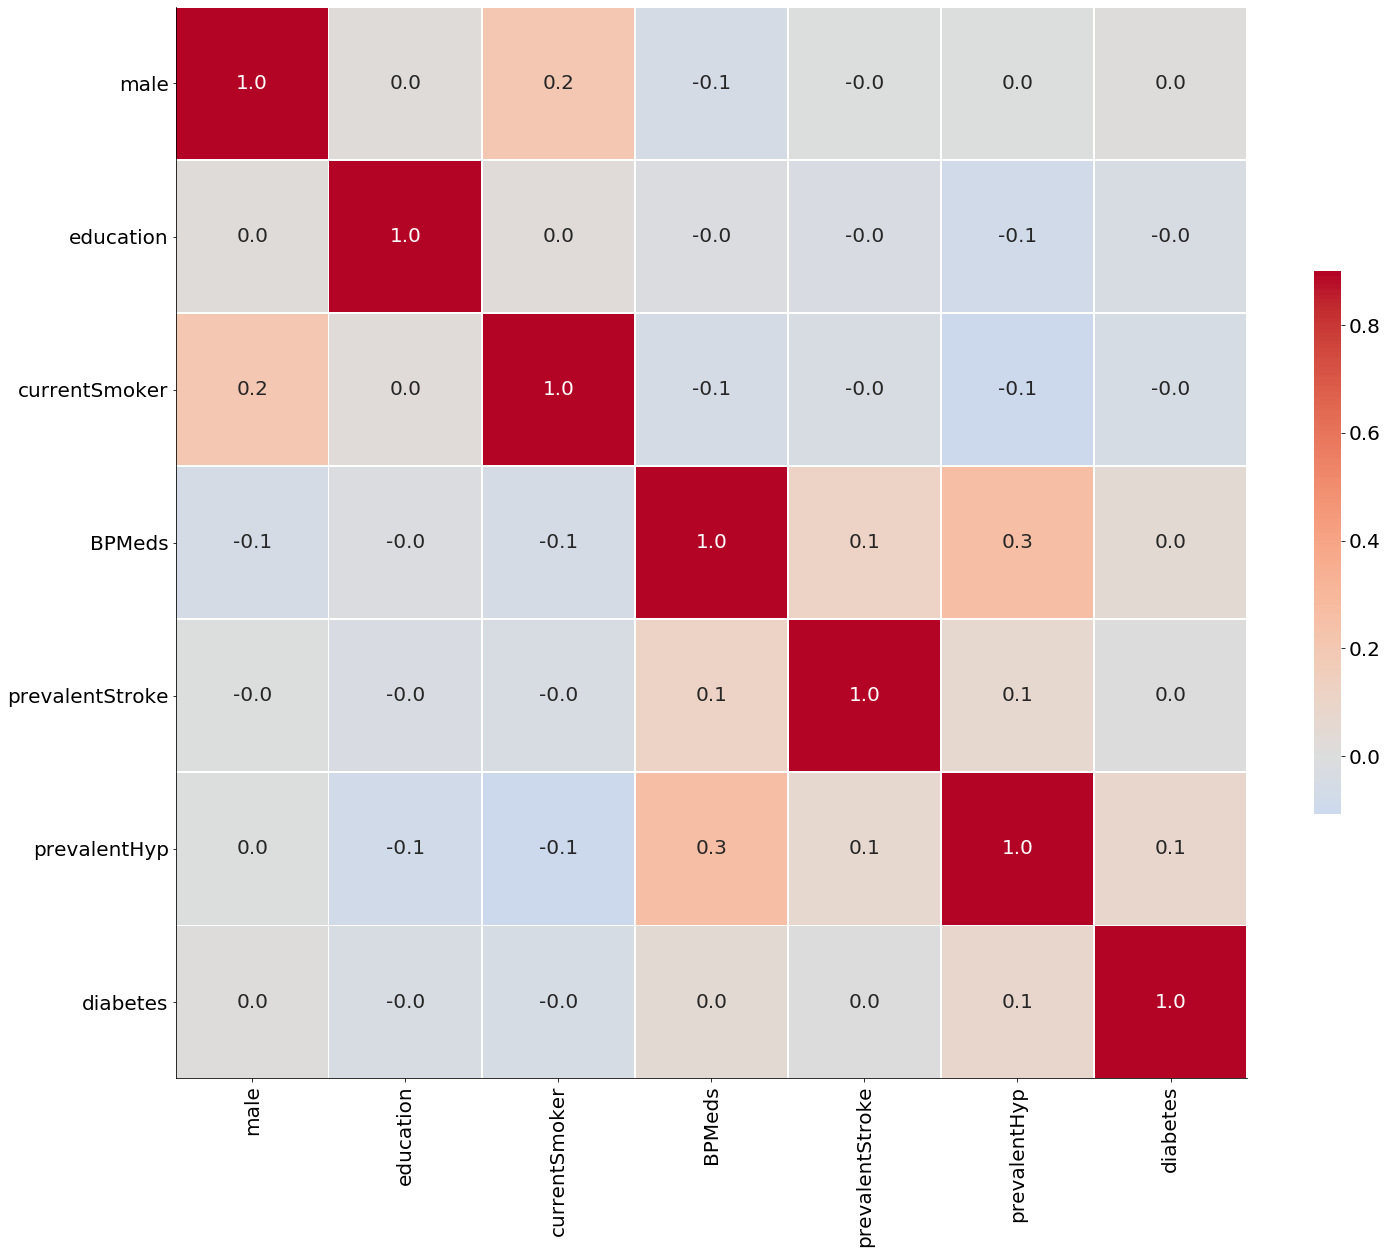

In [11]:

visualizeCorrelation(data_categorical)

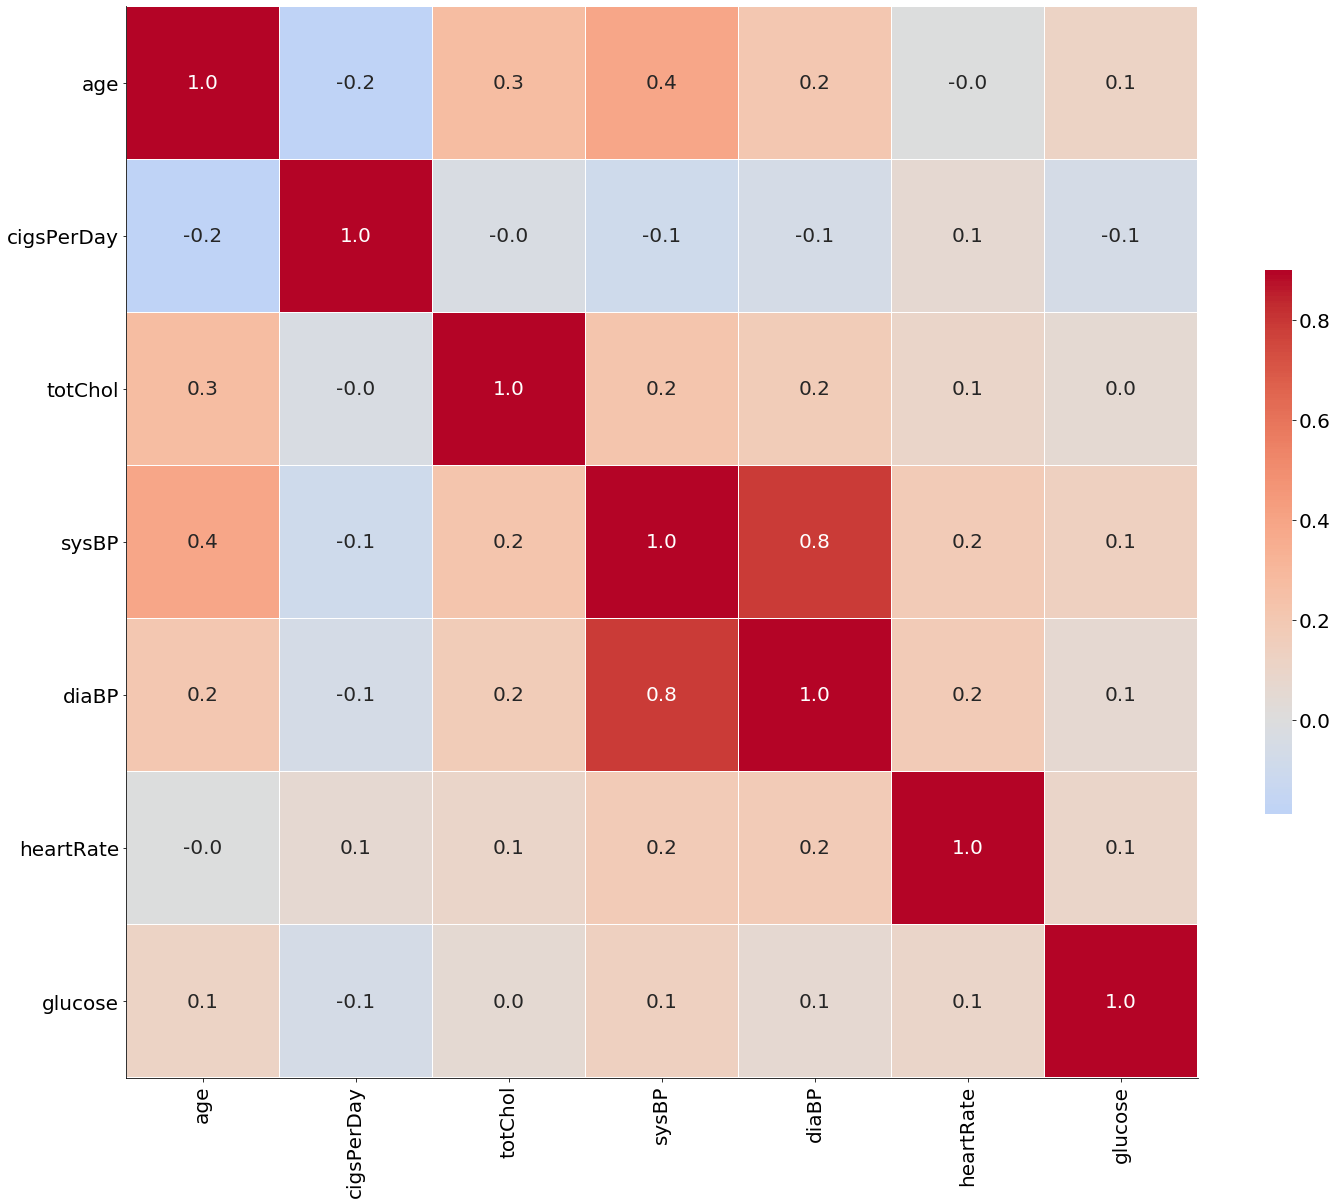

In [12]:
visualizeCorrelation(data_numerical)

In [13]:
def snsPlotNumeric(data_i):
    try:
        
        d1 = data.copy()
        categoricalCols = d1.select_dtypes(include=["category"]).columns 
        numericCols = d1.select_dtypes(include=["number"]).columns 

        for i in numericCols:
            for j in categoricalCols:
                sns.catplot(x=j, y=i, hue=response,   data=data, kind='bar')
            
        for i in range(len(numericCols)):
            for j in range(len(numericCols)-1):
                sns.scatterplot(data=data, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full")
                plt.show()

        #TODO : Education is a category. Why does the graph not show this ?
        for i in categoricalCols:
            for j in [response]:
                plt.figure(figsize=(15, 7))
                plt.subplot(121)
                graph = sns.countplot(y=data[i],
                                        palette="Set2",
                                        order=data[i].value_counts().index[:100])
                plt.title("Distribution of " + i)

                plt.subplot(122)
                sns.countplot(y=data[i],
                                hue=data[j], palette="Set2",
                                order=data[i].value_counts().index[:100])
                plt.ylabel("")
                plt.title("Distribution of " + i + " by " + j)

                plt.subplots_adjust(wspace=.4)

    except Exception as exp:
        print(str(exp))



In [ ]:
snsPlotNumeric(data_01)

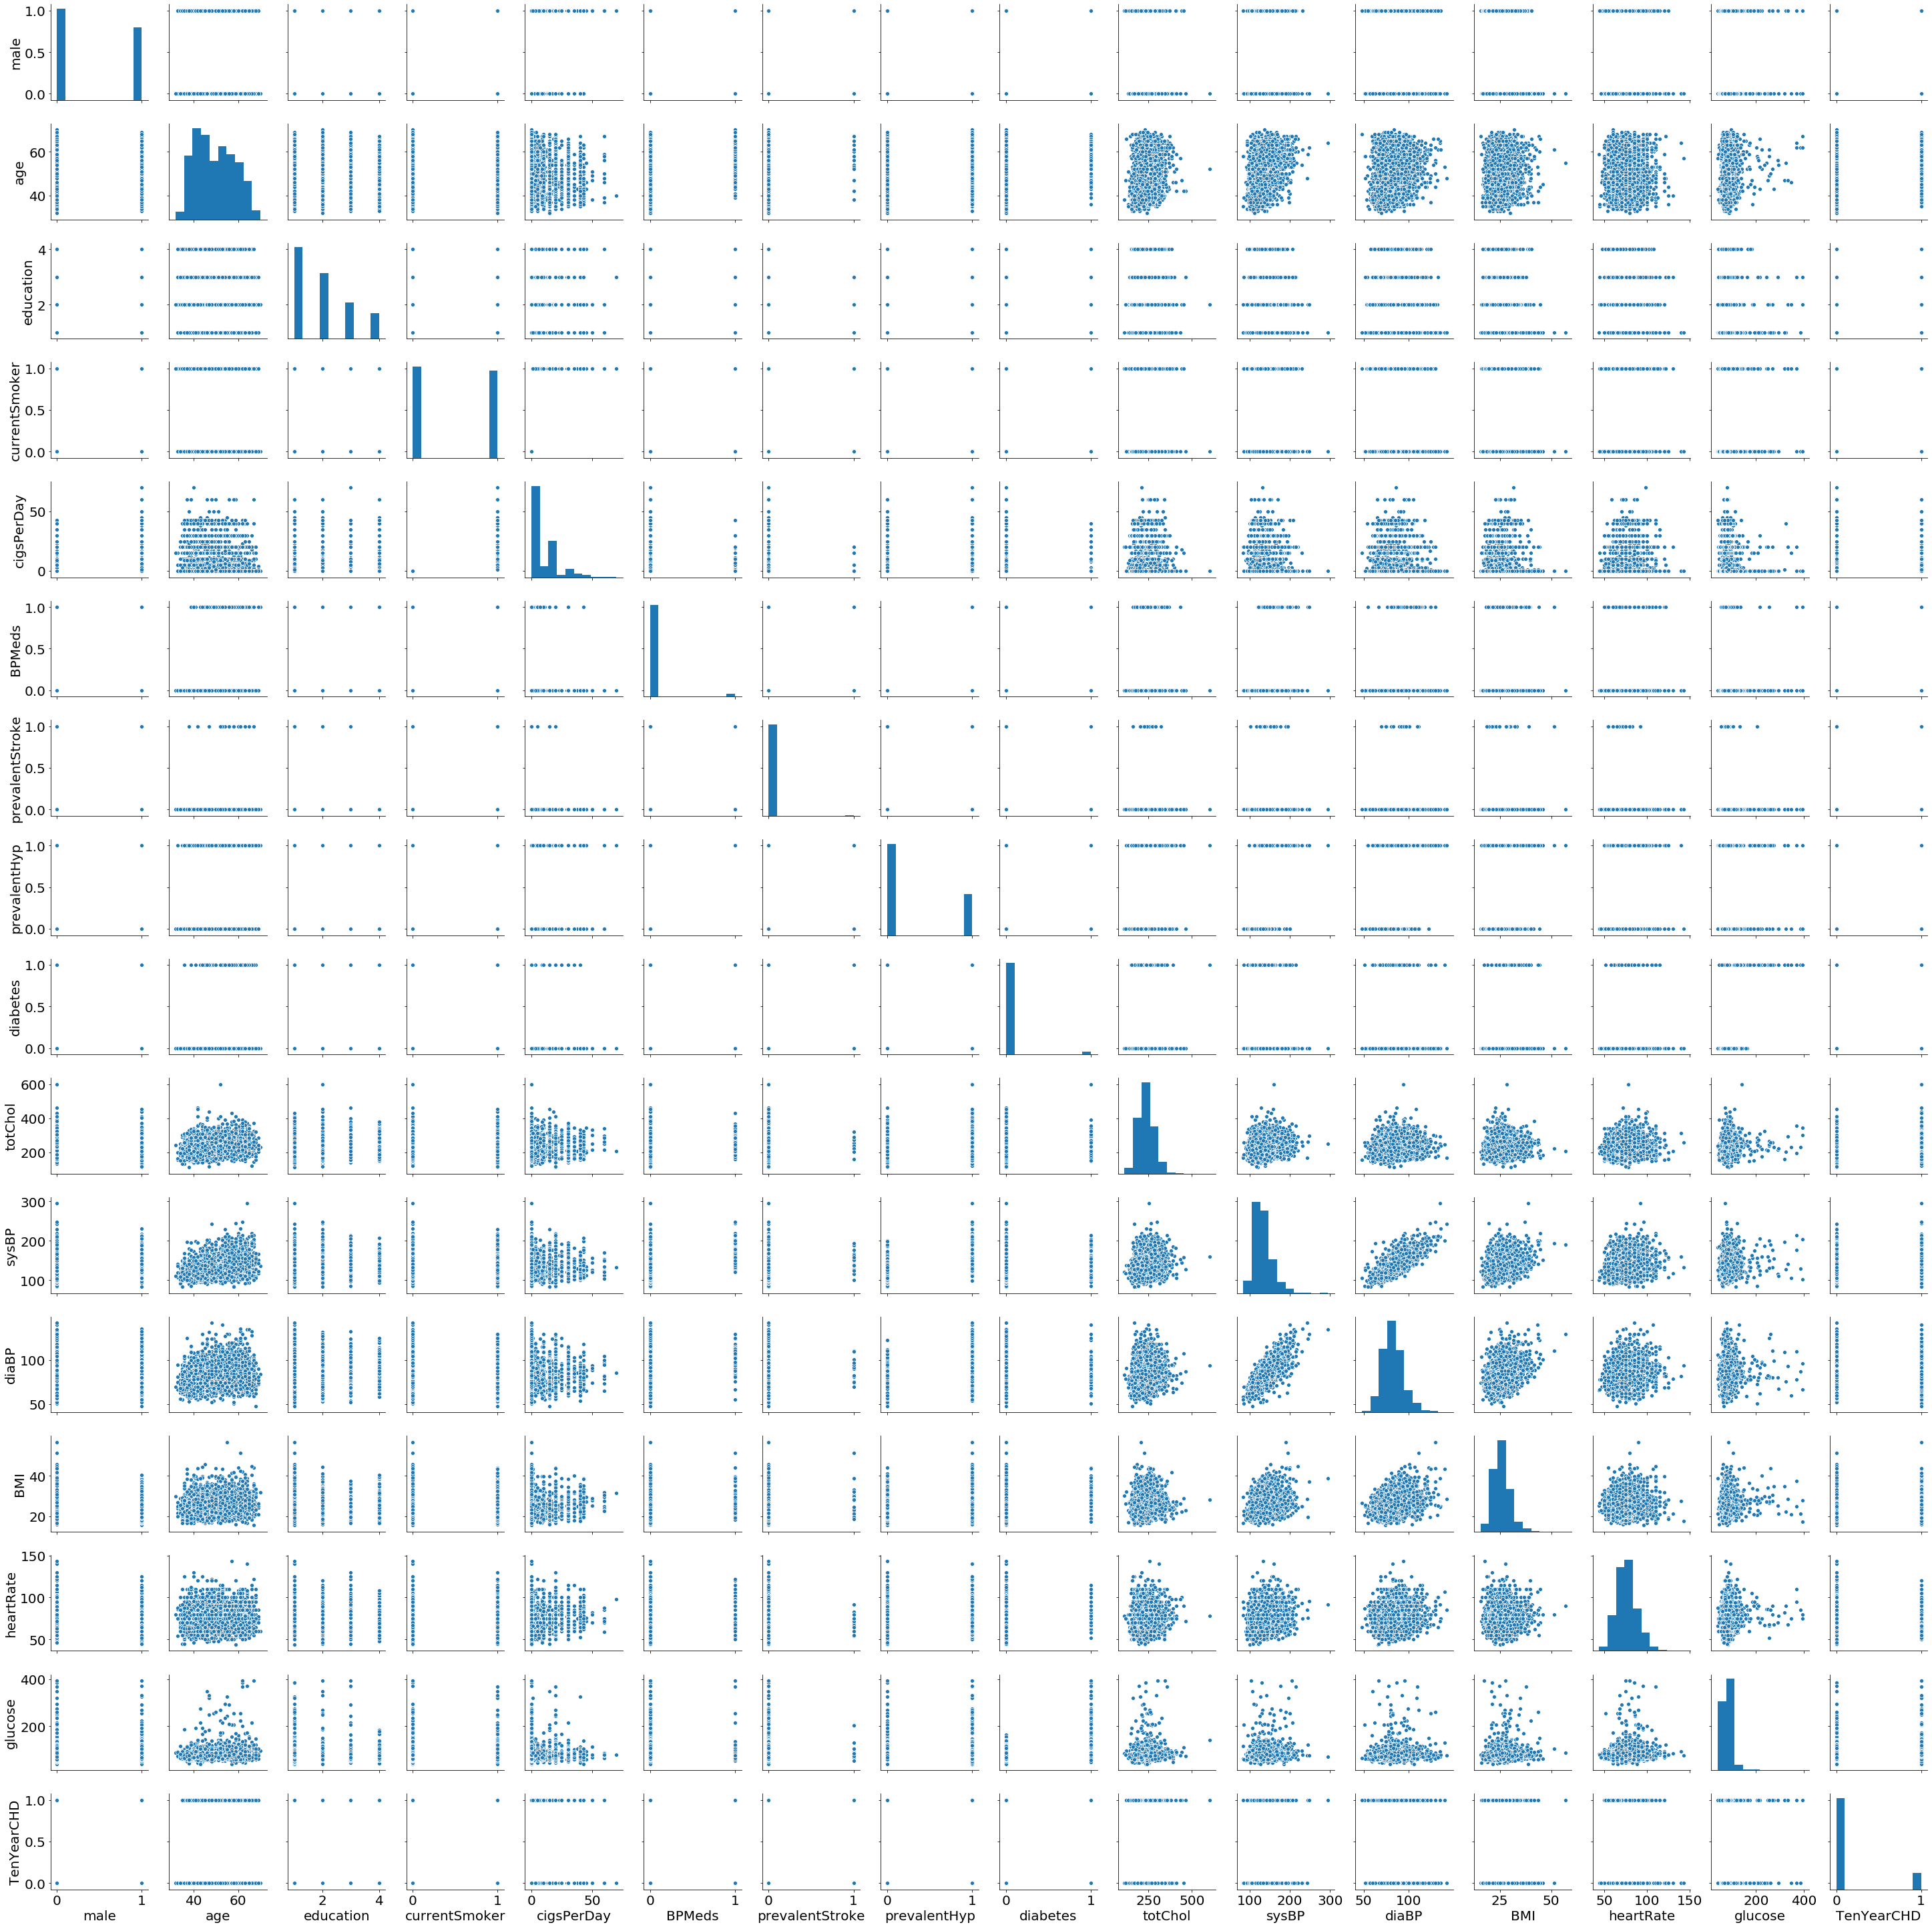

In [16]:
sns.pairplot(data_01)

In [14]:
def multipleFacets(data):
    #g = sns.FacetGrid(data_01, col="education", hue="glucose")
    g = sns.FacetGrid(data_01, col="education")
    g.map_dataframe(sns.scatterplot, x="glucose", y="heartRate")
    g.set_axis_labels("Glucose", "Heart Rate")
    g.add_legend()

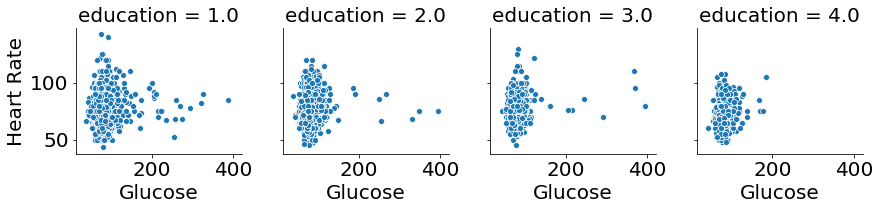

In [15]:
multipleFacets(data_01)

In [18]:
def performPCA(data):
    try:
        pca = PCA()
        pcaModel = pca.fit(data)
        pcaTransformed = pd.DataFrame(pcaModel.transform(data), columns=range(data.shape[1]))
        
        for i in range(len(pcaTransformed.columns)):
            pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)        
        
        comp = pd.DataFrame(pcaModel.components_, columns=data.columns)

        return pcaTransformed
    
    except Exception as exp:
        print(str(exp))


In [19]:
targetDF = data_01[['TenYearCHD']]
print(targetDF.info())
uniqueTarget = targetDF['TenYearCHD'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TenYearCHD  3656 non-null   int64
dtypes: int64(1)
memory usage: 186.2 KB
None


In [20]:
d1 = data_01.drop('TenYearCHD', axis=1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
d2 = scaler.fit_transform(d1)
scaledData = pd.DataFrame(d2, columns=d1.columns)

In [23]:
pca = PCA()

pcaModel = pca.fit(scaledData)
pcaTransformed = pd.DataFrame(pcaModel.transform(scaledData), columns=range(scaledData.shape[1]))
for i in range(len(pcaTransformed.columns)):
    pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)

#print(pcaTransformed.head())

comp = pd.DataFrame(pcaModel.components_, columns=scaledData.columns)
#print(comp)

In [24]:
    def drawScreePlot(pca, columns):
        try:
            percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
            # columns = ['PC1', 'PC2', 'PC3', 'PC4']
            plt.figure(figsize=(8, 8))
            plt.bar(x=range(1, len(columns) + 1), height=percent_variance, tick_label=columns)
            plt.ylabel('Percentate of Variance Explained')
            plt.xlabel('Principal Component')
            plt.title('PCA Scree Plot')
            plt.show()
        except Exception as exp:
            print(str(exp))

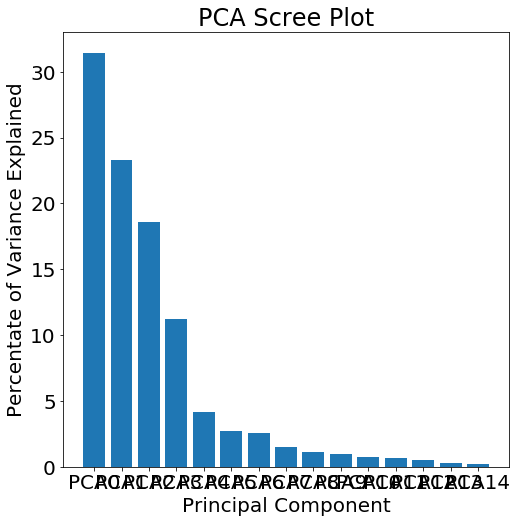

In [25]:
drawScreePlot(pca, pcaTransformed.columns)

In [26]:
    def drawGraph(data, response, uniqueTarget):
        try:

            fig = plt.figure(figsize=(8, 8))
            plt.subplot(121)
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.8)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')
            plt.show()

            plt.subplot(122)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')

            colors = np.random.rand(len(uniqueTarget))

            # for target, color in zip(uniqueTarget, colors):
            for target in (uniqueTarget):
                indicesToKeep = data[response] == target
                plt.scatter(data.loc[indicesToKeep, 'PCA0']
                            , data.loc[indicesToKeep, 'PCA1']
                            # , c=color
                            , s=50)
            plt.legend(uniqueTarget)
            plt.grid()


        except Exception as exp:
            print(str(exp))

In [27]:
pcaTransformedResponse = pd.concat([pcaTransformed, targetDF], axis=1)

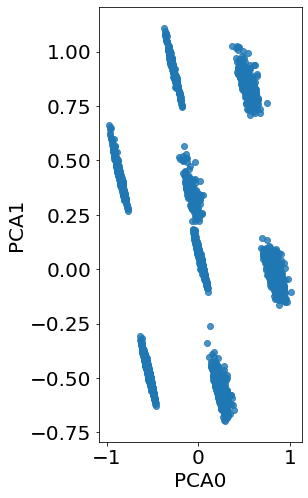

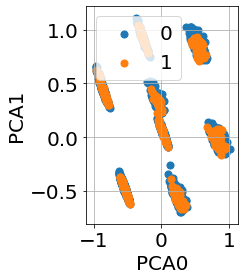

In [28]:
drawGraph(pcaTransformedResponse, 'TenYearCHD', uniqueTarget)

In [29]:
data_02 = performPCA(data_01)

In [30]:
 def showVariance(pcaModel, pca):
        try:
            print(pcaModel.explained_variance_ratio_)
            print(np.cumsum(pcaModel.explained_variance_ratio_))
            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), pca.explained_variance_ratio_)
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, max(pca.explained_variance_ratio_) + 0.05])
            # plt.xticks(list(range(1, len(pca.explained_variance_ratio_))))
            plt.xlabel('Principal Components')
            plt.ylabel('Variance Explained')
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, 1.1])
            plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
            # plt.xticks(list(range(1, 61)))
            plt.xlabel('# of Principal Components')
            plt.ylabel('Cumulative Variance Explained')
            plt.show()

        except Exception as exp:
            print(str(exp))

[0.31455186 0.23304546 0.18607464 0.11195193 0.04164222 0.02696261
 0.02591223 0.01504677 0.01127699 0.00954838 0.00710737 0.00676893
 0.00541935 0.00258908 0.00210216]
[0.31455186 0.54759732 0.73367196 0.84562389 0.88726611 0.91422872
 0.94014096 0.95518773 0.96646472 0.9760131  0.98312047 0.98988941
 0.99530875 0.99789784 1.        ]


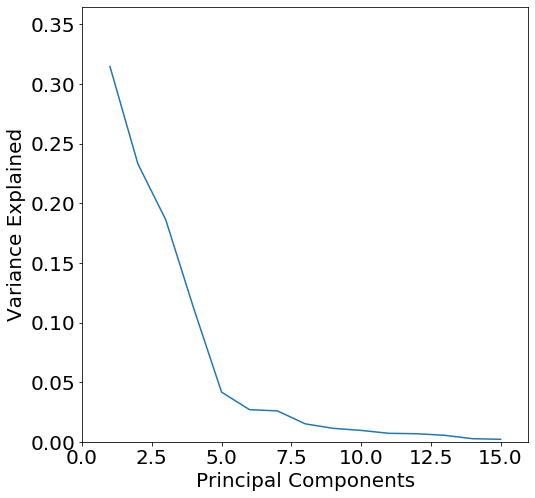

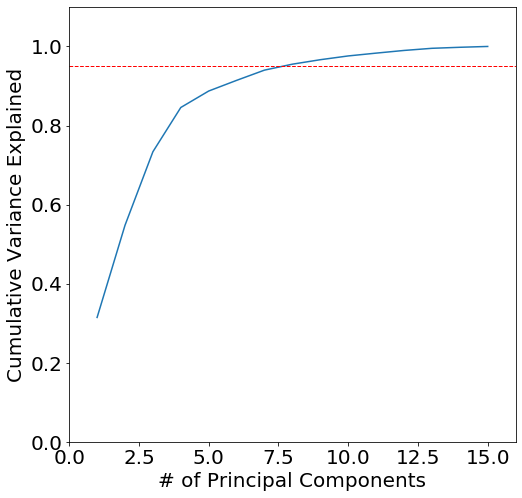

In [31]:
showVariance(pcaModel, pca)

## Balance the data and scale

In [32]:
X0 = data_01.drop('diaBP', axis=1)

In [33]:
X0.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0


In [34]:
X0.groupby('TenYearCHD').count()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099
1,557,557,557,557,557,557,557,557,557,557,557,557,557,557


In [35]:
X_majority = X0[X0.TenYearCHD==0]
X_minority = X0[X0.TenYearCHD==1]

In [36]:
X0.count()

male               3656
age                3656
education          3656
currentSmoker      3656
cigsPerDay         3656
BPMeds             3656
prevalentStroke    3656
prevalentHyp       3656
diabetes           3656
totChol            3656
sysBP              3656
BMI                3656
heartRate          3656
glucose            3656
TenYearCHD         3656
dtype: int64

In [37]:
from sklearn.utils import resample

X_majority_downsampled = resample(X_majority, 
                                 replace=False,
                                 n_samples=557,
                                 random_state=13)

In [38]:
X1 = pd.concat([X_majority_downsampled, X_minority])

In [39]:
X1.groupby('TenYearCHD').count()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,557,557,557,557,557,557,557,557,557,557,557,557,557,557
1,557,557,557,557,557,557,557,557,557,557,557,557,557,557


In [55]:
X2 = X0.drop('TenYearCHD', axis=1)
y2 = X0['TenYearCHD']

In [75]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.326)
X3, y3 = oversample.fit_resample(X2, y2)
X3.insert(14, 'TenYearCHD', y3, True) 
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4109 non-null   int64  
 1   age              4109 non-null   int64  
 2   education        4109 non-null   float64
 3   currentSmoker    4109 non-null   int64  
 4   cigsPerDay       4109 non-null   float64
 5   BPMeds           4109 non-null   float64
 6   prevalentStroke  4109 non-null   int64  
 7   prevalentHyp     4109 non-null   int64  
 8   diabetes         4109 non-null   int64  
 9   totChol          4109 non-null   float64
 10  sysBP            4109 non-null   float64
 11  BMI              4109 non-null   float64
 12  heartRate        4109 non-null   float64
 13  glucose          4109 non-null   float64
 14  TenYearCHD       4109 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 481.6 KB


In [76]:
X3.groupby('TenYearCHD').count()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099
1,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010


In [77]:
X_majority3 = X3[X3.TenYearCHD==0]
X_minority3 = X3[X3.TenYearCHD==1]

In [78]:
X_majority_downsampled3 = resample(X_majority3, 
                                 replace=False,
                                 n_samples=1010,
                                 random_state=13)

In [79]:
X4 = pd.concat([X_majority_downsampled3, X_minority3])
X4.groupby('TenYearCHD').count()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010
1,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010


## Modelling helper functions

In [88]:
def hyperparam_finder(X1, space, model):
    
    X = X1.drop('TenYearCHD', axis=1)
    y = X1['TenYearCHD']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=13, stratify=y)    
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv, verbose=10)

    result = search.fit(X_train, y_train)

    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [81]:
def summarise_results(model, X_test, y_test):
    
    print('Score=%.3f' %model.score(X_test,y_test))
    
    y_pred = model.predict(X_test)
    
    target_names = ['Yes', 'No']
    print(classification_report(y_test, y_pred, target_names=target_names))

    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_auc = roc_auc_score(y_test, lr_probs)
    print('ROC AUC=%.3f' % (lr_auc))
    
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    pyplot.plot(lr_fpr, lr_tpr)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()    
    pyplot.show()
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [82]:
def run_model(X1, model):
    
    X_var = X1.drop('TenYearCHD', axis=1)
    y_var = X1['TenYearCHD']

    X,y = scale(X_var), y_var
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=13, stratify=y)    
        
    model.fit(X_train,y_train)
    
    summarise_results(model, X_test, y_test)

## SVM classifier

In [89]:
svm_space = dict()
svm_space['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
svm_space['decision_function_shape'] = ['ovo']
svm_space['C'] = [1e-1, 1, 10]

hyperparam_finder(X1, svm_space, SVC())

Fitting 30 folds for each of 12 candidates, totalling 360 fits
Best Score: 0.6755855255855255
Best Hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'linear'}


No handles with labels found to put in legend.


Score=0.690
              precision    recall  f1-score   support

         Yes       0.69      0.68      0.69       168
          No       0.69      0.69      0.69       167

    accuracy                           0.69       335
   macro avg       0.69      0.69      0.69       335
weighted avg       0.69      0.69      0.69       335

ROC AUC=0.734


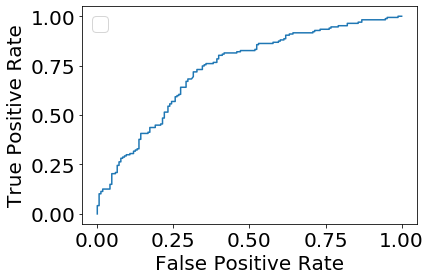

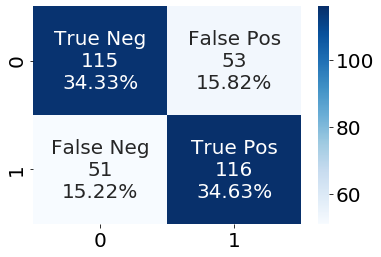

In [90]:
svm_c = SVC(C=1.0, kernel='linear', decision_function_shape='ovo', probability=True)
run_model(X1, svm_c)

No handles with labels found to put in legend.


Score=0.650
              precision    recall  f1-score   support

         Yes       0.66      0.63      0.64       303
          No       0.64      0.67      0.66       303

    accuracy                           0.65       606
   macro avg       0.65      0.65      0.65       606
weighted avg       0.65      0.65      0.65       606

ROC AUC=0.690


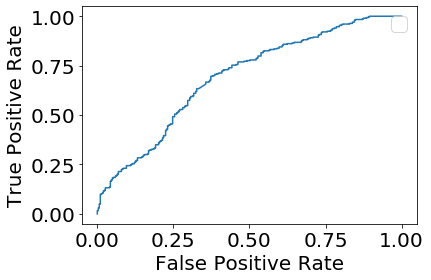

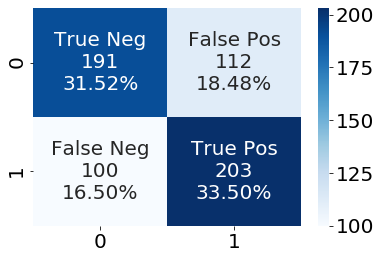

In [91]:
run_model(X4, svm_c)

## Logistic regression

In [ ]:
lr_space = dict()
lr_space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
lr_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
lr_space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
lr_space['multi_class']= ['auto', 'ovr', 'multinomial']

hyperparam_finder(X1, lr_space, LogisticRegression())

No handles with labels found to put in legend.


Score=0.696
              precision    recall  f1-score   support

         Yes       0.70      0.70      0.70       168
          No       0.69      0.69      0.69       167

    accuracy                           0.70       335
   macro avg       0.70      0.70      0.70       335
weighted avg       0.70      0.70      0.70       335

ROC AUC=0.739


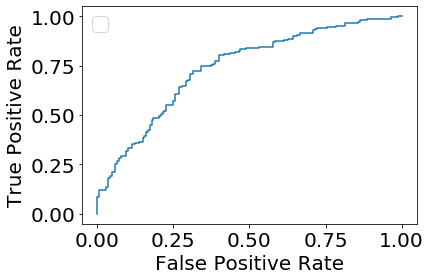

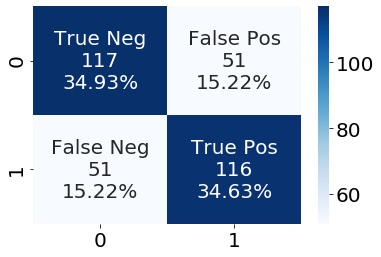

In [92]:
log_reg =  LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg', random_state=13)
run_model(X1, log_reg)

No handles with labels found to put in legend.


Score=0.640
              precision    recall  f1-score   support

         Yes       0.64      0.66      0.65       303
          No       0.65      0.62      0.63       303

    accuracy                           0.64       606
   macro avg       0.64      0.64      0.64       606
weighted avg       0.64      0.64      0.64       606

ROC AUC=0.691


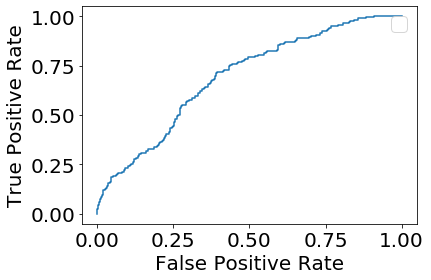

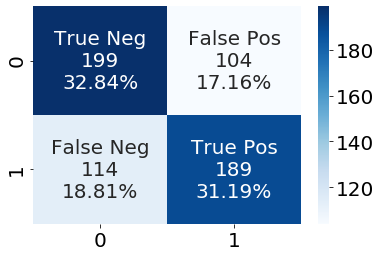

In [95]:
run_model(X4, log_reg)

## Gaussian NB 

No handles with labels found to put in legend.


Score=0.549
              precision    recall  f1-score   support

         Yes       0.53      0.96      0.68       168
          No       0.77      0.14      0.23       167

    accuracy                           0.55       335
   macro avg       0.65      0.55      0.46       335
weighted avg       0.65      0.55      0.46       335

ROC AUC=0.747


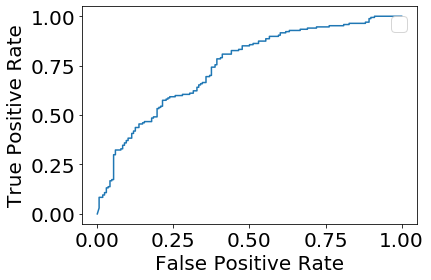

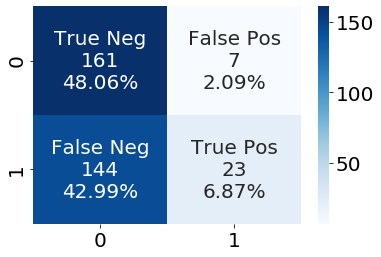

In [94]:
gnb = GaussianNB()
run_model(X1, gnb)

No handles with labels found to put in legend.


Score=0.581
              precision    recall  f1-score   support

         Yes       0.55      0.88      0.68       303
          No       0.71      0.28      0.40       303

    accuracy                           0.58       606
   macro avg       0.63      0.58      0.54       606
weighted avg       0.63      0.58      0.54       606

ROC AUC=0.684


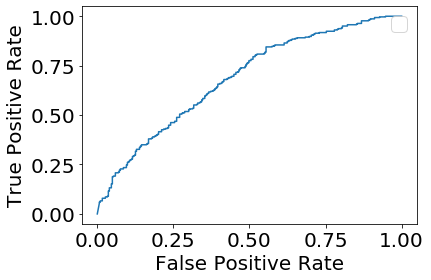

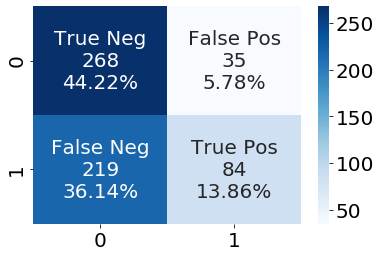

In [96]:
run_model(X4, gnb)

## Random forest classifier 

In [ ]:
rf_space = dict()
rf_space['n_estimators'] = [25, 50, 75, 100, 125]
rf_space['max_samples'] = [0.1, 0.2, 0.3, 0.4, 0.5]
rf_space['max_features'] = [1, 2, 3, 4, 5, 6]

hyperparam_finder(X1, rf_space, RandomForestClassifier())

No handles with labels found to put in legend.


Score=0.660
              precision    recall  f1-score   support

         Yes       0.66      0.66      0.66       168
          No       0.66      0.66      0.66       167

    accuracy                           0.66       335
   macro avg       0.66      0.66      0.66       335
weighted avg       0.66      0.66      0.66       335

ROC AUC=0.738


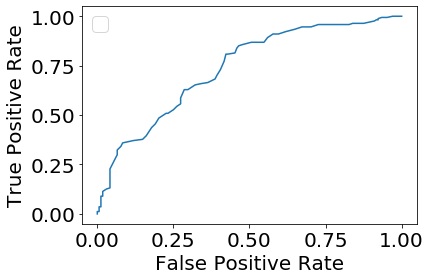

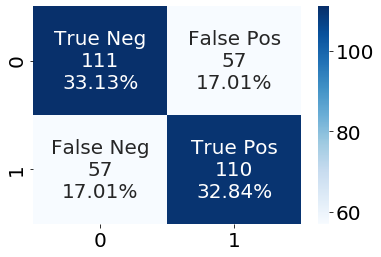

In [97]:
rf = RandomForestClassifier(max_features=3, max_samples=0.2, n_estimators=125)
run_model(X1, rf)

No handles with labels found to put in legend.


Score=0.677
              precision    recall  f1-score   support

         Yes       0.69      0.65      0.67       303
          No       0.67      0.71      0.69       303

    accuracy                           0.68       606
   macro avg       0.68      0.68      0.68       606
weighted avg       0.68      0.68      0.68       606

ROC AUC=0.756


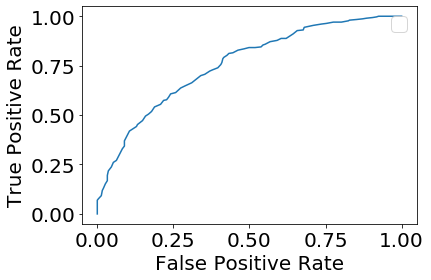

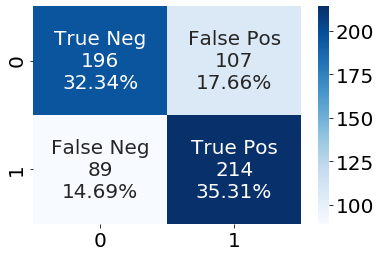

In [98]:
run_model(X4, rf)

## XGBoost 

In [ ]:
xgb_space = dict()
xgb_space['booster'] = ['gbtree', 'gblinear']
xgb_space['max_depth'] = [2, 4, 6]
xgb_space['tree_method'] = ['auto', 'exact', 'approx']

hyperparam_finder(X1, xgb_space, XGBClassifier())

/home/condauser/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
No handles with labels found to put in legend.


[22:32:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score=0.651
              precision    recall  f1-score   support

         Yes       0.66      0.64      0.65       168
          No       0.65      0.66      0.65       167

    accuracy                           0.65       335
   macro avg       0.65      0.65      0.65       335
weighted avg       0.65      0.65      0.65       335

ROC AUC=0.704


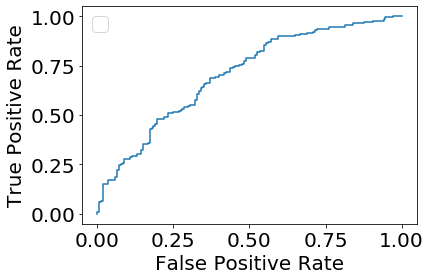

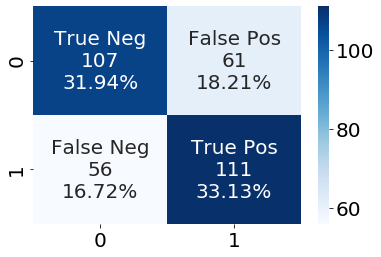

In [99]:
xgb = XGBClassifier()
run_model(X1, xgb)

/home/condauser/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
No handles with labels found to put in legend.


[22:32:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score=0.723
              precision    recall  f1-score   support

         Yes       0.72      0.73      0.72       303
          No       0.73      0.72      0.72       303

    accuracy                           0.72       606
   macro avg       0.72      0.72      0.72       606
weighted avg       0.72      0.72      0.72       606

ROC AUC=0.790


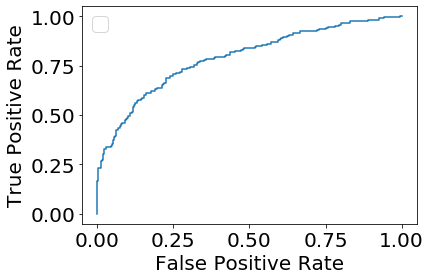

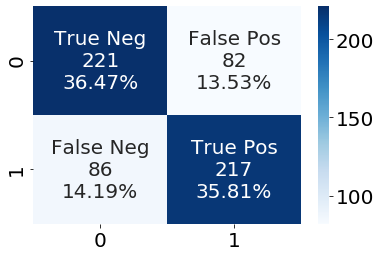

In [100]:
run_model(X4, xgb)